In [2]:
import numpy as np 
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
!gdown "https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv"

Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv
To: c:\Users\Ali Hasan\AppData\Local\Programs\Microsoft VS Code\bike_sharing.csv

  0%|          | 0.00/648k [00:00<?, ?B/s]
100%|██████████| 648k/648k [00:00<00:00, 11.3MB/s]


In [7]:
b_sharing=pd.read_csv("c:/Users/Ali Hasan/AppData/Local/Programs/Microsoft VS Code/bike_sharing.csv")

In [8]:
b_sharing

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [9]:
b_sharing.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [13]:
b_sharing.shape

(10886, 12)

In [14]:
b_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


Datatype of following attributes needs to changed to proper data type

1.datetime - to datetime

2.season - to categorical

3.holiday - to categorical

4.workingday - to categorical

5.weather - to categorical

In [15]:
b_sharing['datetime']=pd.to_datetime(b_sharing['datetime'])


col_ch=['season','holiday','workingday','weather']
for col in col_ch:
    b_sharing[col]=b_sharing[col].astype('object')

In [16]:
b_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  object        
 2   holiday     10886 non-null  object        
 3   workingday  10886 non-null  object        
 4   weather     10886 non-null  object        
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(4)
memory usage: 1020.7+ KB


In [18]:
b_sharing.iloc[:,1:].describe(include='all')

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.0,10886.0,10886.0,10886.0,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
unique,4.0,2.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,4.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2734.0,10575.0,7412.0,7192.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,NaN,NaN,NaN,NaN,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,NaN,NaN,NaN,NaN,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,NaN,NaN,NaN,NaN,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,NaN,NaN,NaN,NaN,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,NaN,NaN,NaN,NaN,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000


In [20]:
b_sharing.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

THERE ARE NO NULL VALUES IN THE DATA SET

In [22]:
# max and min date in the dataset
print(b_sharing['datetime'].min())
print(b_sharing['datetime'].max())

2011-01-01 00:00:00
2012-12-19 23:00:00


In [24]:
#unique values
b_sharing[col_ch].melt().groupby(['variable', 'value'])[['value']].count()


value
variable   value       
holiday    0      10575
           1        311
season     1       2686
           2       2733
           3       2733
           4       2734
weather    1       7192
           2       2834
           3        859
           4          1
workingday 0       3474
           1       7412

Univariate Analysis 

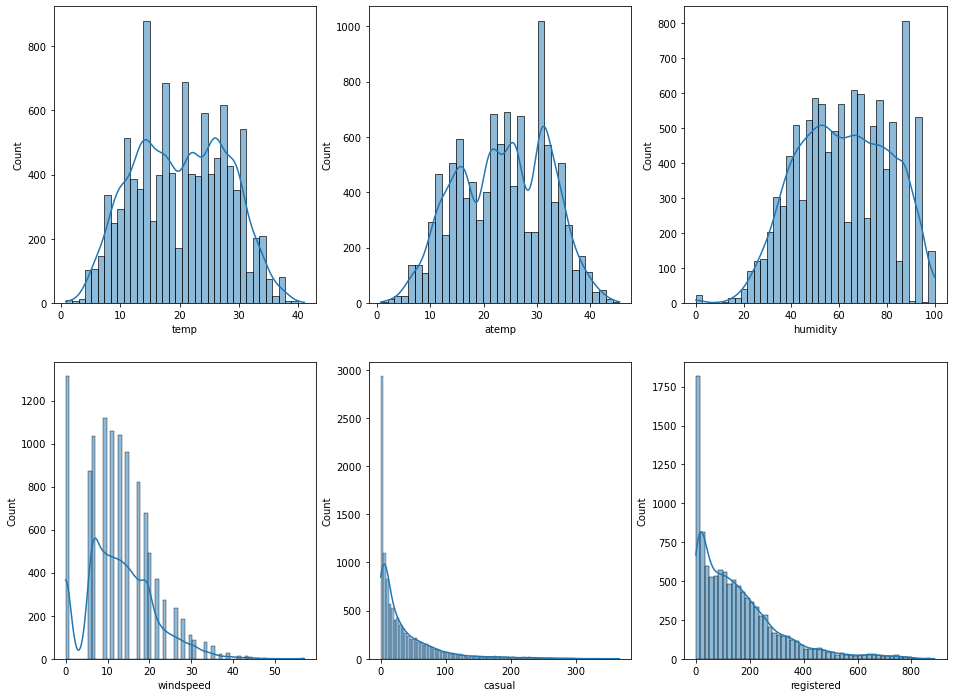

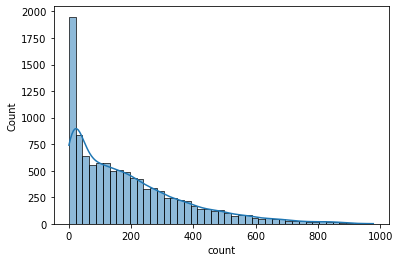

In [27]:
num_cols = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered','count']

fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(16, 12))

index = 0
for row in range(2):
    for col in range(3):
        sns.histplot(b_sharing[num_cols[index]], ax=axis[row, col], kde=True)
        index += 1
        
plt.show()
sns.histplot(b_sharing[num_cols[-1]], kde=True) 
plt.show()

1.Casual,registered and count follow poisson distrubtion

2.temp, atemp , humidity follows normal distrubtion

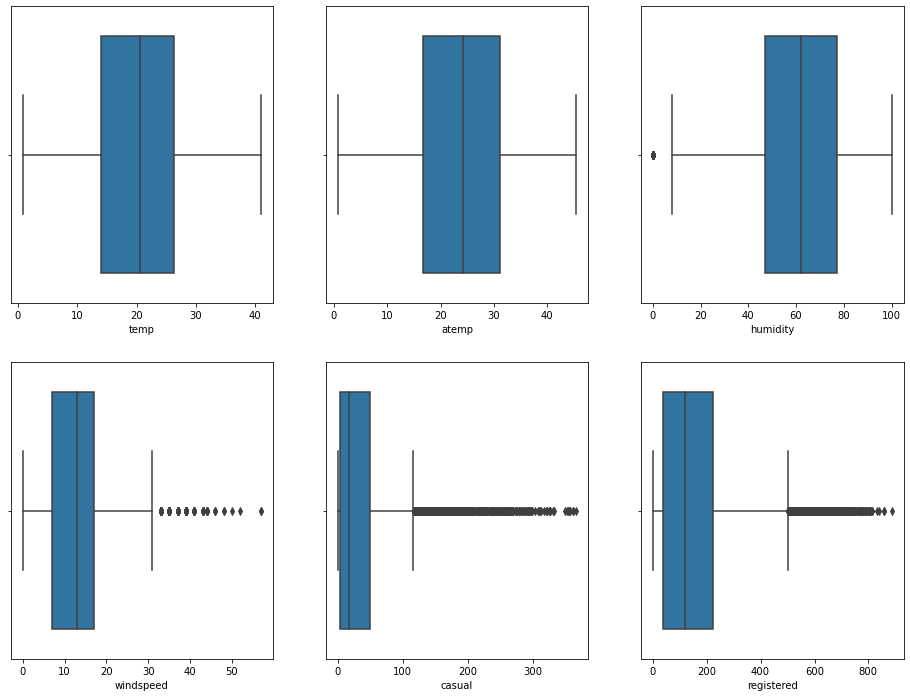

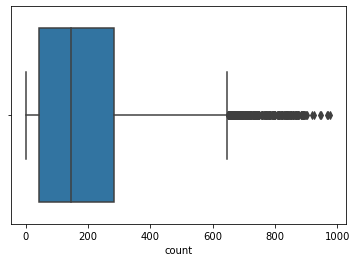

In [28]:

fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(16, 12))

index = 0
for row in range(2):
    for col in range(3):
        sns.boxplot(x=b_sharing[num_cols[index]], ax=axis[row, col])
        index += 1
        
plt.show()
sns.boxplot(x=b_sharing[num_cols[-1]]) 
plt.show()

Humidity,count,casual,windspeed and registered have quite a few outliers

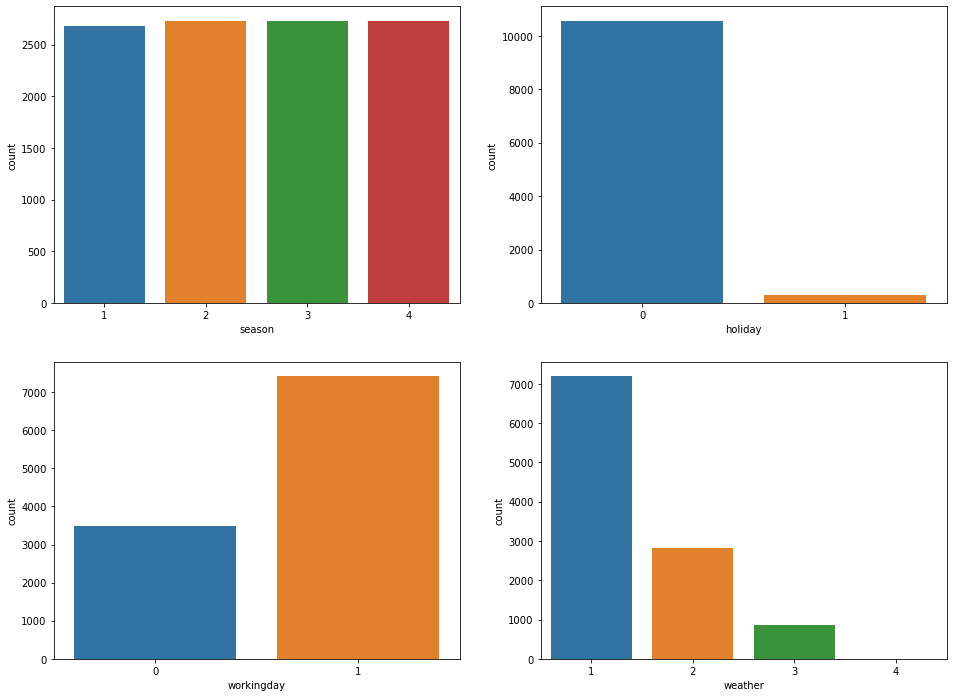

In [30]:
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

index = 0
for row in range(2):
    for col in range(2):
        sns.countplot(data=b_sharing, x=col_ch[index], ax=axis[row, col])
        index += 1
        
plt.show()

Each season has equal number of days

Bivariate analysis

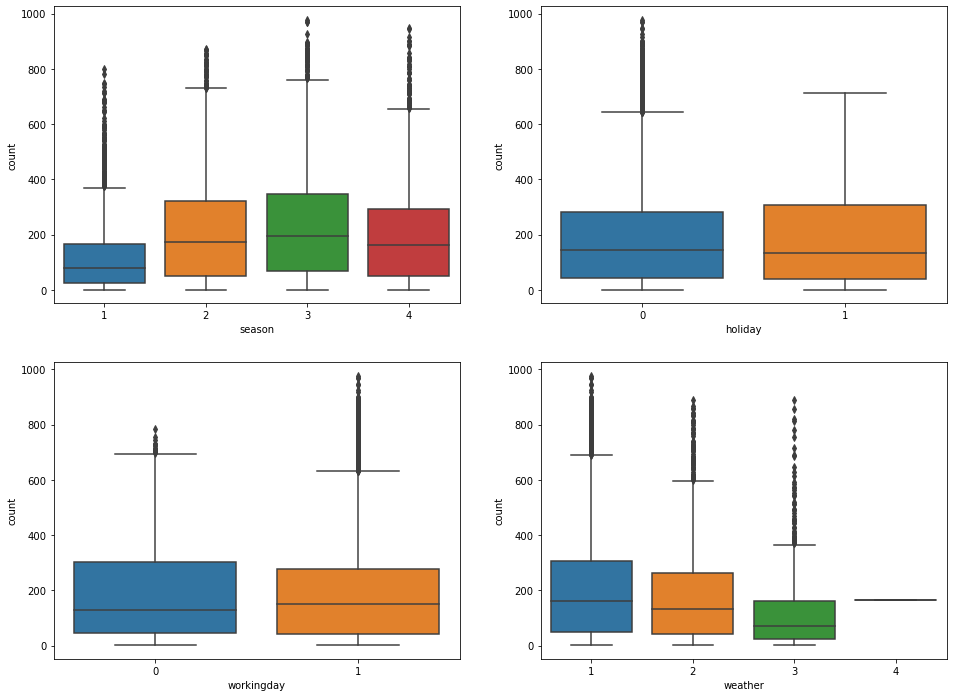

In [31]:
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

index = 0
for row in range(2):
    for col in range(2):
        sns.boxplot(data=b_sharing, x=col_ch[index], y='count', ax=axis[row, col])
        index += 1
        
plt.show()

1.There are more bikes rented in the Summer and Fall season compared to Rain and thunderstorm or snow.

2.Holidays see mor number of bikes rented compared to that of a working day.

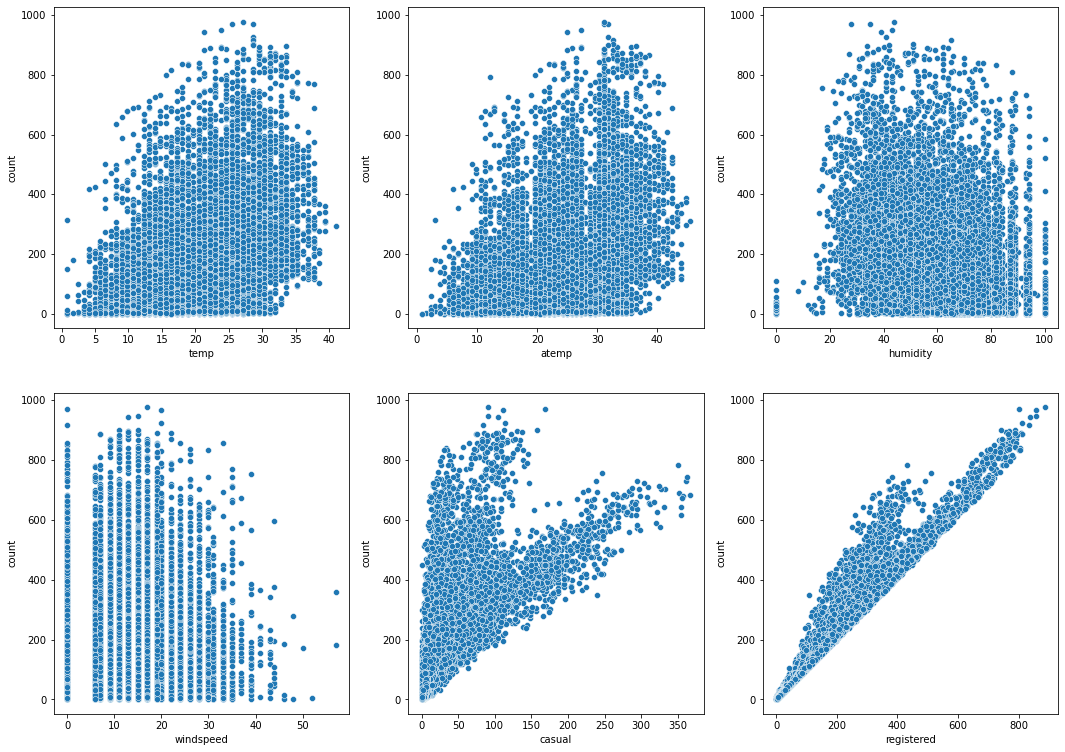

In [33]:
fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(18, 13))
index = 0
for row in range(2):
    for col in range(3):
        sns.scatterplot(data=b_sharing, x=num_cols[index], y='count', ax=axis[row, col])
        index += 1
        
plt.show()

1.When the humidity is less then 20 there are few number of bikes rented

2.When the temp is less than 5 there are few bikes rented and the most number of bikes are rented between 20 and 30 temp.

3.When the windspeed is greater than 50 few number of bike are rented and when the speed is around 20 there are more number of bike are rented 

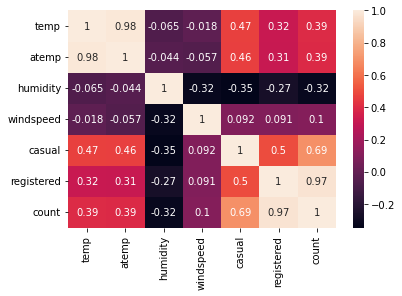

In [34]:
sns.heatmap(b_sharing.corr(), annot=True)
plt.show()

Hypothesis Testing - 1
Null Hypothesis (H0): Weather is independent of the season

Alternate Hypothesis (H1): Weather is not independent of the season

Significance level (alpha): 0.05

We will use chi-square test to test hypyothesis defined above.

In [36]:
data_table = pd.crosstab(b_sharing['season'], b_sharing['weather'])
print("Observed values:")
data_table

Observed values:


weather,1,2,3,4
season,,,,
1,1759,715,211,1
2,1801,708,224,0
3,1930,604,199,0
4,1702,807,225,0


In [37]:
val = stats.chi2_contingency(data_table)
expected_values = val[3]
expected_values

array([[1.77454639e+03, 6.99258130e+02, 2.11948742e+02, 2.46738931e-01],
       [1.80559765e+03, 7.11493845e+02, 2.15657450e+02, 2.51056403e-01],
       [1.80559765e+03, 7.11493845e+02, 2.15657450e+02, 2.51056403e-01],
       [1.80625831e+03, 7.11754180e+02, 2.15736359e+02, 2.51148264e-01]])

In [40]:
nrows, ncols = 4, 4
dof = (nrows-1)*(ncols-1)
print("degrees of freedom: ", dof)
alpha = 0.05


chi_sqr = sum([(o-e)**2/e for o, e in zip(data_table.values, expected_values)])
chi_sqr_statistic = chi_sqr[0] + chi_sqr[1]
print("chi-square test statistic: ", chi_sqr_statistic)

critical_val = stats.chi2.ppf(q=1-alpha, df=dof)
print(f"critical value: {critical_val}")

p_val = 1-stats.chi2.cdf(x=chi_sqr_statistic, df=dof)
print(f"p-value: {p_val}")

if p_val <= alpha:
    print("\nSince p-value is less than the alpha 0.05, We reject the Null Hypothesis.")
else:
    print("Since p-value is greater than the alpha 0.05, We do not reject the Null Hypothesis")

degrees of freedom:  9
chi-square test statistic:  44.09441248632364
critical value: 16.918977604620448
p-value: 1.3560001579371317e-06

Since p-value is less than the alpha 0.05, We reject the Null Hypothesis.


Hypothesis Testing - 2
Null Hypothesis: Working day has no effect on the number of cycles being rented.

Alternate Hypothesis: Working day has effect on the number of cycles being rented.

Significance level (alpha): 0.05

We will use the 2-Sample T-Test to test the hypothess defined above

In [41]:
data_group1 = b_sharing[b_sharing['workingday']==0]['count'].values
data_group2 = b_sharing[b_sharing['workingday']==1]['count'].values

np.var(data_group1), np.var(data_group2)

(30171.346098942427, 34040.69710674686)

In [42]:
stats.ttest_ind(a=data_group1, b=data_group2, equal_var=True)

Ttest_indResult(statistic=-1.2096277376026694, pvalue=0.22644804226361348)

Since the P-Value is less than 0.05 we will not reject the Null-Hypothesis . We dont have enough dat to determine that if working day effects renting a bike.

Hypothesis Testing - 3
Null Hypothesis: Number of cycles rented is similar in different weather and season.

Alternate Hypothesis: Number of cycles rented is not similar in different weather and season.

Significance level (alpha): 0.05

Here, we will use the ANOVA to test the hypothess defined above

In [43]:
dp1 = b_sharing[b_sharing['weather']==1]['count'].values
dp2 = b_sharing[b_sharing['weather']==2]['count'].values
dp3 = b_sharing[b_sharing['weather']==3]['count'].values
dp4 = b_sharing[b_sharing['weather']==4]['count'].values

dp5 = b_sharing[b_sharing['season']==1]['count'].values
dp6 = b_sharing[b_sharing['season']==2]['count'].values
dp7 = b_sharing[b_sharing['season']==3]['count'].values
dp8 = b_sharing[b_sharing['season']==4]['count'].values

# conduct the one-way anova
stats.f_oneway(dp1, dp2, dp3, dp4, dp5, dp6, dp7, dp8)

F_onewayResult(statistic=127.96661249562491, pvalue=2.8074771742434642e-185)

The P-value is less than 0.05 we reject the null hypothesis, this means that the number of cycles rented in diffrent season or weather conditons are not simillar.

Insights:-
1.In summer and fall seasons more bikes are rented as compared to other seasons.

2.Whenever its a holiday more bikes are rented.

3.It is also clear from the workingday also that whenever day is holiday or weekend, slightly more bikes were rented.

4.Whenever there is rain, thunderstorm, snow or fog, there were less bikes were rented.

5.Whenever the humidity is less than 20, number of bikes rented is very very low.

6.Whenever the temperature is less than 10, number of bikes rented is less.

7.Whenever the windspeed is greater than 35, number of bikes rented is less.

Recommendations:-


1.In summer and fall seasons the company should have more bikes in stock to be rented. Because the demand in these seasons is higher as compared to other seasons.

2.With a significance level of 0.05, workingday has no effect on the number of bikes being rented.

3.In very low humid days, company should have less bikes in the stock to be rented.

4.Whenever temprature is less than 10 or in very cold days, company should have less bikes.

5.Whenever the windspeed is greater than 35 or in thunderstorms, company should have less bikes in stock to be rented.
